In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # helps create advanced visualizations

In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 65% 96.0M/149M [00:00<00:00, 997MB/s]
100% 149M/149M [00:00<00:00, 579MB/s] 


In [5]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df

In [6]:
tr_df = get_class_paths('/content/Training')

In [7]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0051.jpg,glioma
1,/content/Training/glioma/Tr-gl_0111.jpg,glioma
2,/content/Training/glioma/Tr-gl_1098.jpg,glioma
3,/content/Training/glioma/Tr-gl_0545.jpg,glioma
4,/content/Training/glioma/Tr-glTr_0008.jpg,glioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_0447.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0242.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0722.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1277.jpg,pituitary


In [8]:
ts_df = get_class_paths('/content/Testing')

In [9]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1,/content/Testing/glioma/Te-gl_0074.jpg,glioma
2,/content/Testing/glioma/Te-gl_0049.jpg,glioma
3,/content/Testing/glioma/Te-gl_0259.jpg,glioma
4,/content/Testing/glioma/Te-gl_0208.jpg,glioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0173.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0187.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0180.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0148.jpg,pituitary


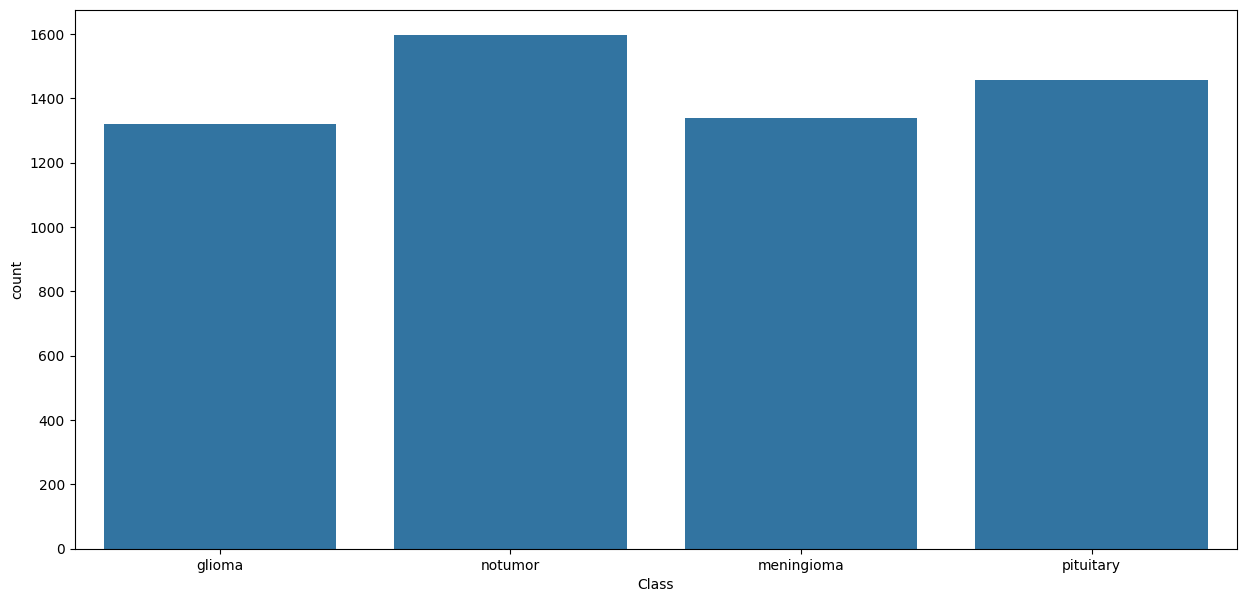

In [10]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

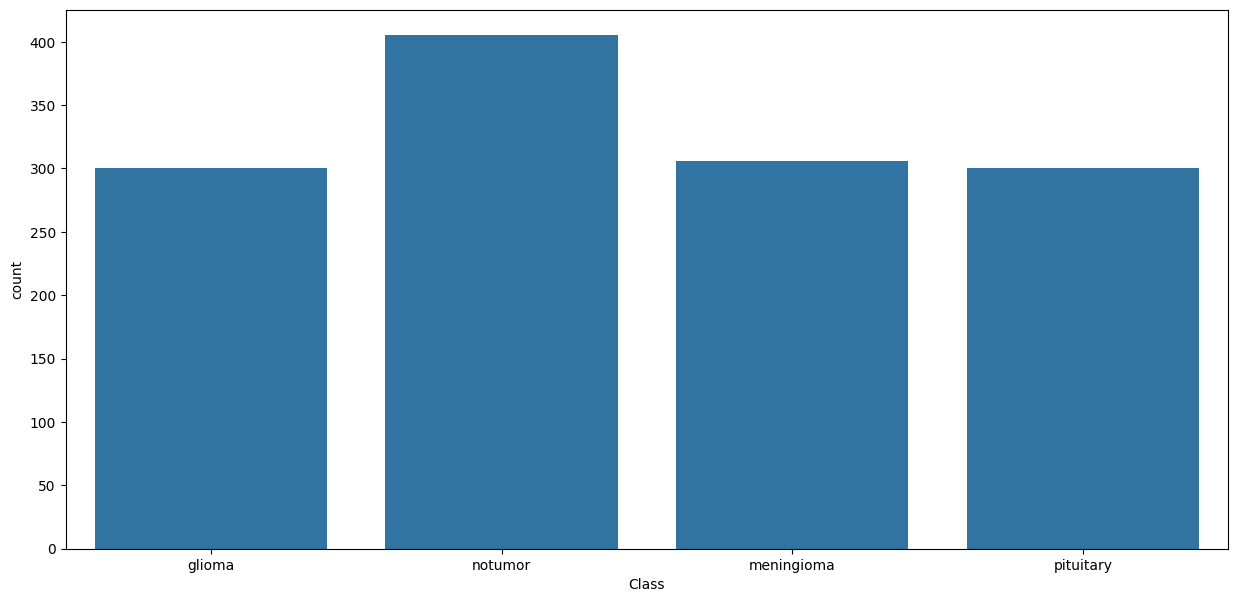

In [11]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [14]:
valid_df

,Class Path,Class
574,/content/Testing/notumor/Te-no_0339.jpg,notumor
1117,/content/Testing/pituitary/Te-pi_0065.jpg,pituitary
88,/content/Testing/glioma/Te-gl_0011.jpg,glioma
64,/content/Testing/glioma/Te-gl_0091.jpg,glioma
678,/content/Testing/notumor/Te-no_0114.jpg,notumor
...,...,...
1036,/content/Testing/pituitary/Te-pi_0106.jpg,pituitary
957,/content/Testing/meningioma/Te-me_0171.jpg,meningioma
599,/content/Testing/notumor/Te-no_0325.jpg,notumor
216,/content/Testing/glioma/Te-gl_0111.jpg,glioma


In [15]:
ts_df

,Class Path,Class
1271,/content/Testing/pituitary/Te-pi_0284.jpg,pituitary
402,/content/Testing/notumor/Te-no_0315.jpg,notumor
1210,/content/Testing/pituitary/Te-pi_0085.jpg,pituitary
841,/content/Testing/meningioma/Te-me_0099.jpg,meningioma
1242,/content/Testing/pituitary/Te-pi_0281.jpg,pituitary
...,...,...
1254,/content/Testing/pituitary/Te-pi_0013.jpg,pituitary
1059,/content/Testing/pituitary/Te-pi_0234.jpg,pituitary
1179,/content/Testing/pituitary/Te-pi_0198.jpg,pituitary
482,/content/Testing/notumor/Te-no_0353.jpg,notumor


# Preprocessing Data

In [16]:
batch_size = 32 # for Training only, using 16 for Testing, can be adjusted based on GPU memory
img_size = (299, 299)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

## Creating 3 dataflows for training, validation, and testing

### These flows will take our image data from the image datatframes and prepare them for our Deep Learning Model

In [17]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df, x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df, x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

ts_gen = image_generator.flow_from_dataframe(
    ts_df, x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


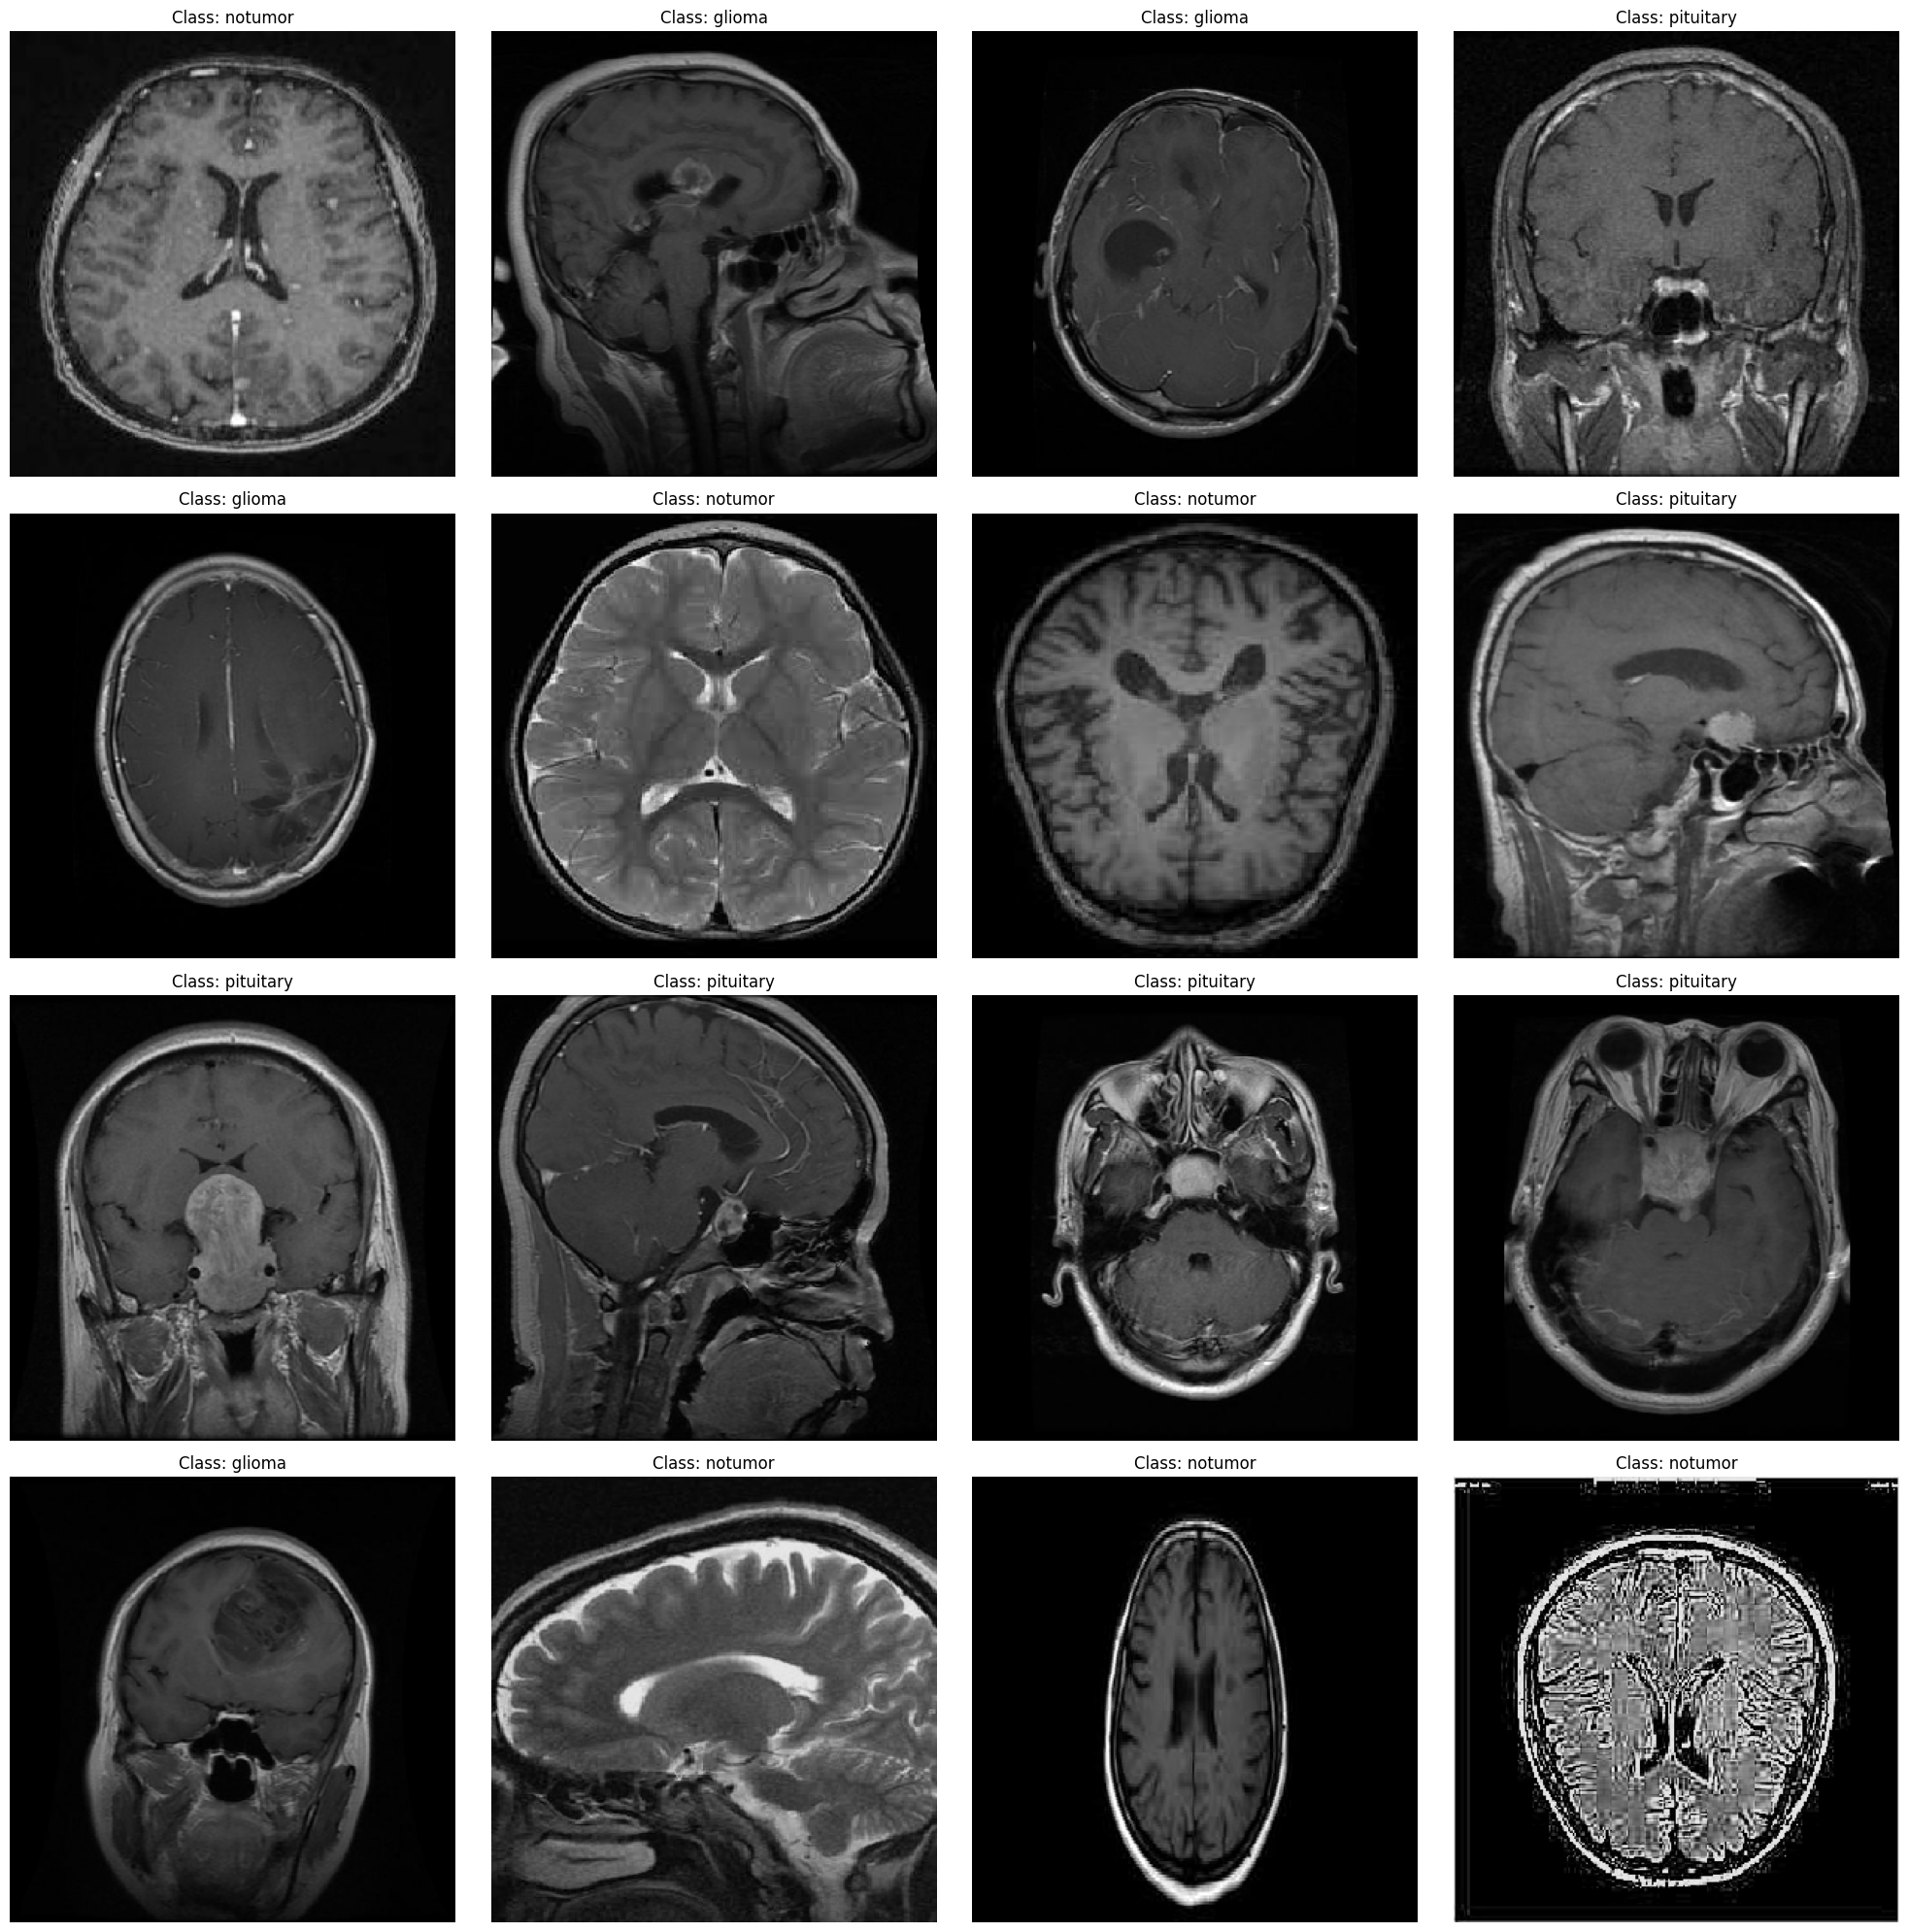

In [18]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

In [20]:
model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
    Precision(),
    Recall()]
)

In [21]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.6645 - loss: 0.9049 - precision: 0.7994 - recall: 0.5116 - val_accuracy: 0.9221 - val_loss: 0.1985 - val_precision: 0.9264 - val_recall: 0.9221
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.9751 - loss: 0.0865 - precision: 0.9785 - recall: 0.9740 - val_accuracy: 0.8427 - val_loss: 0.4225 - val_precision: 0.8479 - val_recall: 0.8427
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 837ms/step - accuracy: 0.9856 - loss: 0.0496 - precision: 0.9872 - recall: 0.9841 - val_accuracy: 0.9817 - val_loss: 0.0535 - val_precision: 0.9832 - val_recall: 0.9817
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 837ms/step - accuracy: 0.9956 - loss: 0.0150 - precision: 0.9957 - recall: 0.9954 - val_accuracy: 0.9863 - val_loss: 0.0510 - val_precision: 0.9862 - val_recall: 0.9832
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 836ms/step - accuracy: 0.9954 - loss: 0.0130 - precision: 0.9956 - recall: 0.9954 - val_accuracy: 0.9924 - 

<Figure size 2000x1200 with 0 Axes>

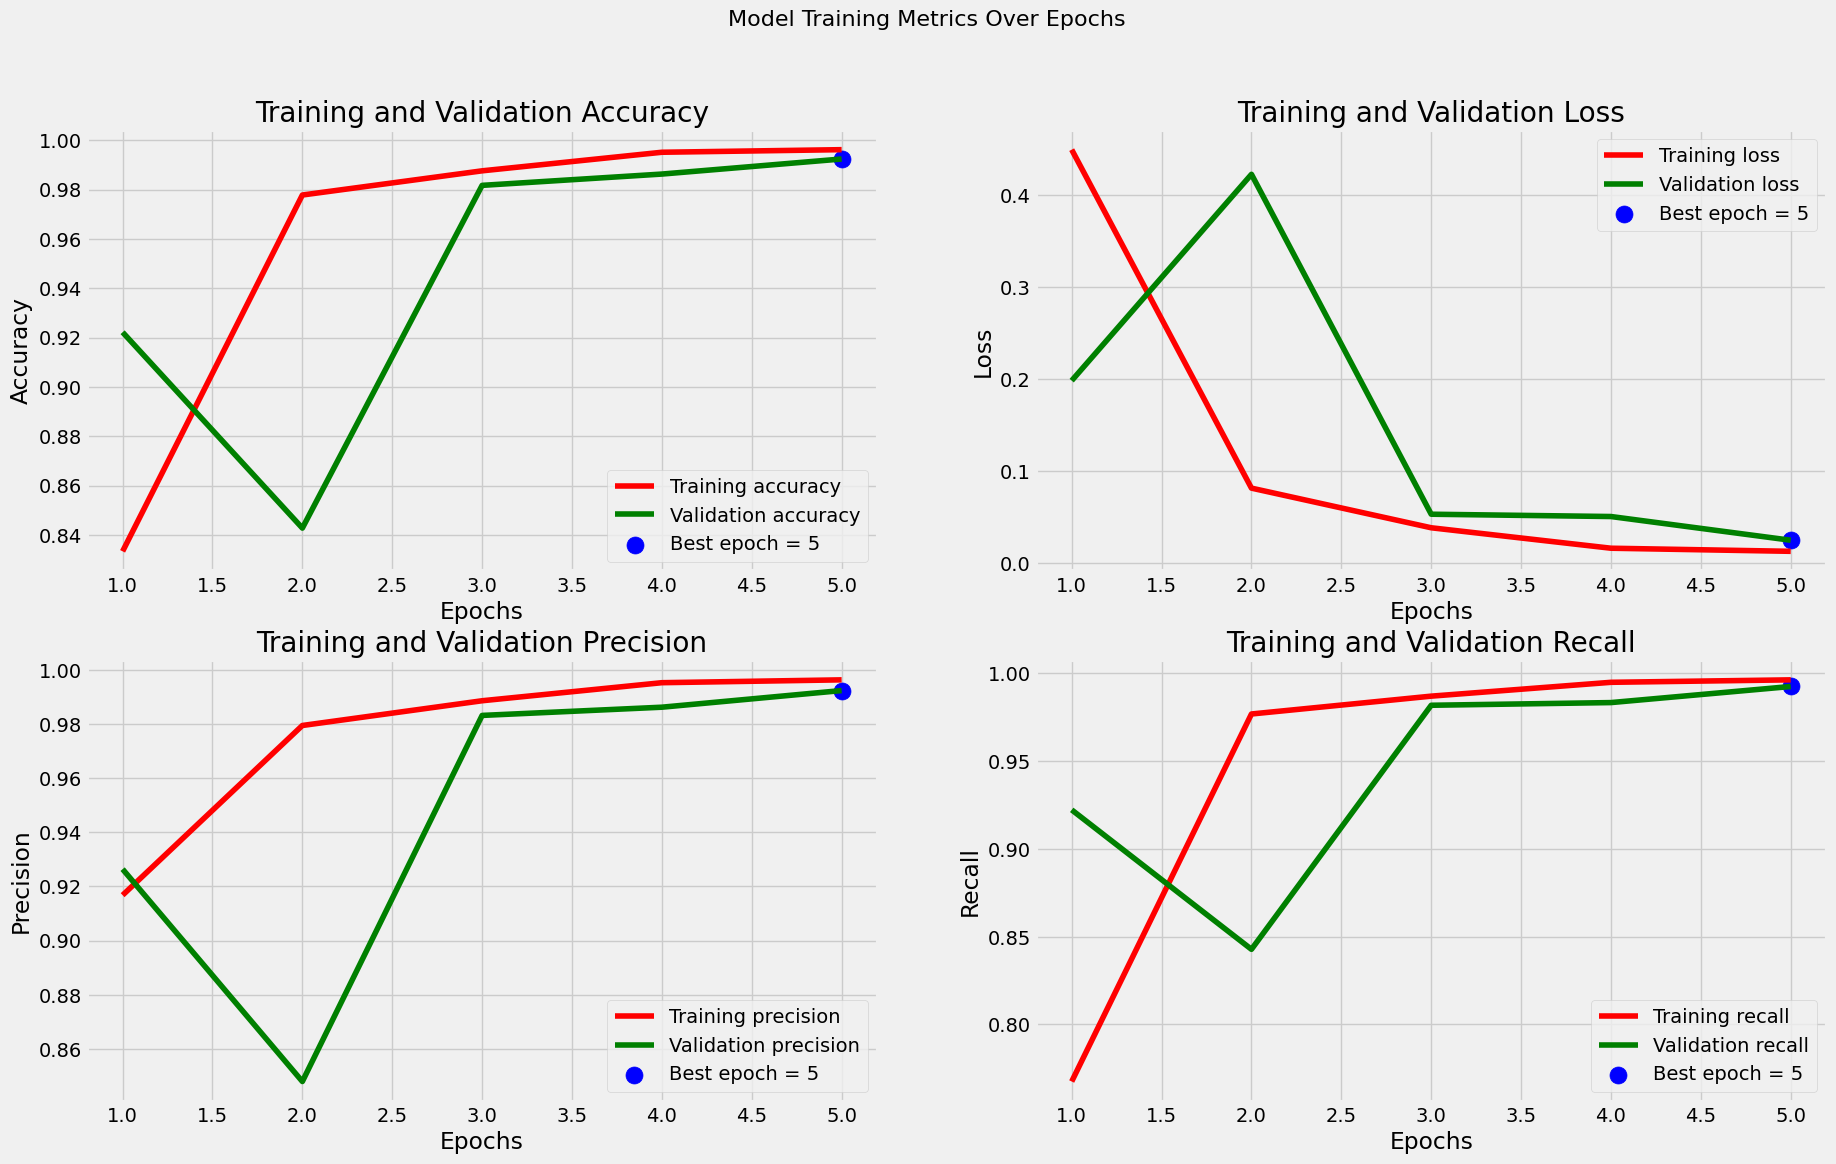

In [22]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [23]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 248ms/step - accuracy: 0.9996 - loss: 0.0024 - precision: 0.9996 - recall: 0.9996
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.9908 - loss: 0.0277 - precision: 0.9908 - recall: 0.9908


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9831 - loss: 0.0601 - precision: 0.9831 - recall: 0.9831
Train Accuracy: 99.95%
Train Loss: 0.0032


Validation Accuracy: 99.24%
Validation Loss: 0.0239


Test Accuracy: 98.48%
Test Loss: 0.0626


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step


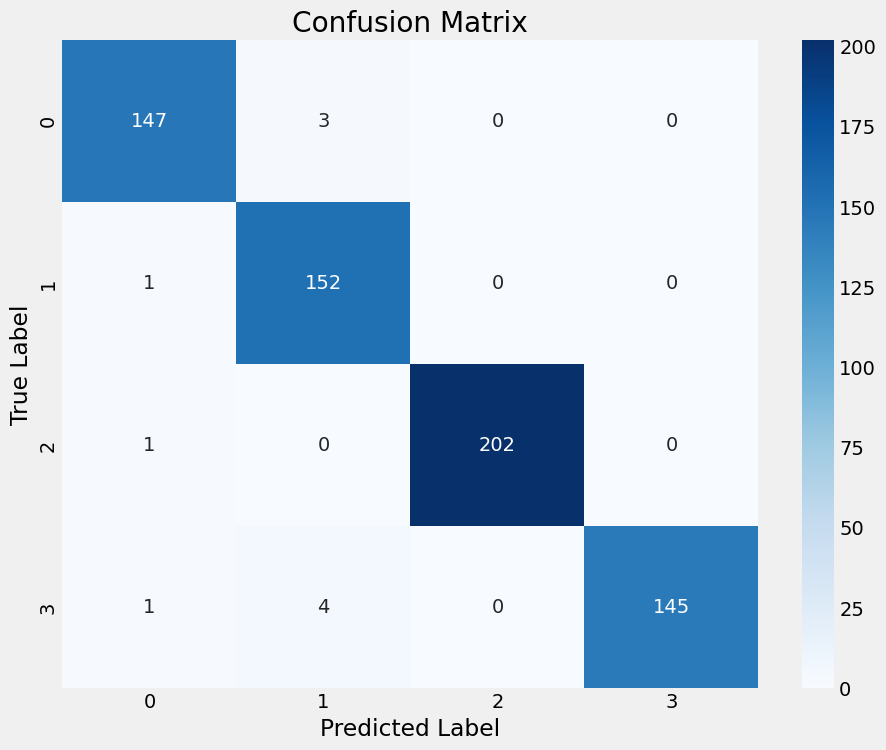

In [24]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.array(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


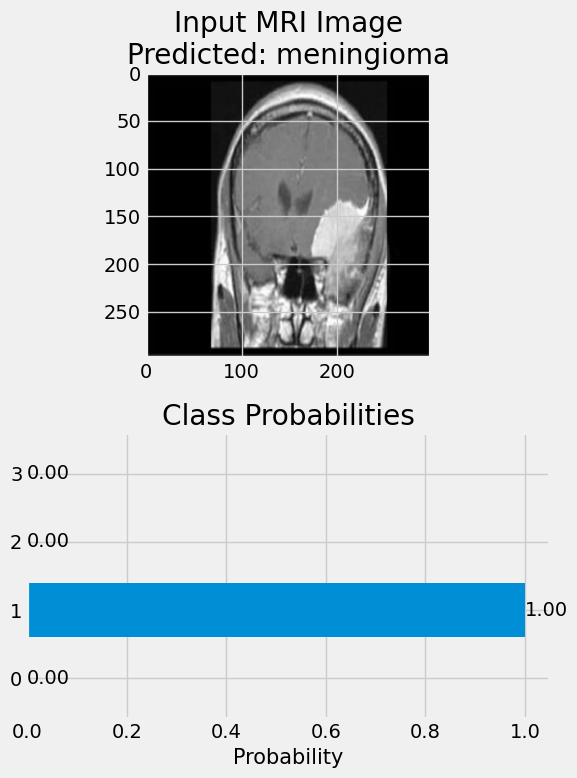


Predicted tumor type: meningioma


In [26]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


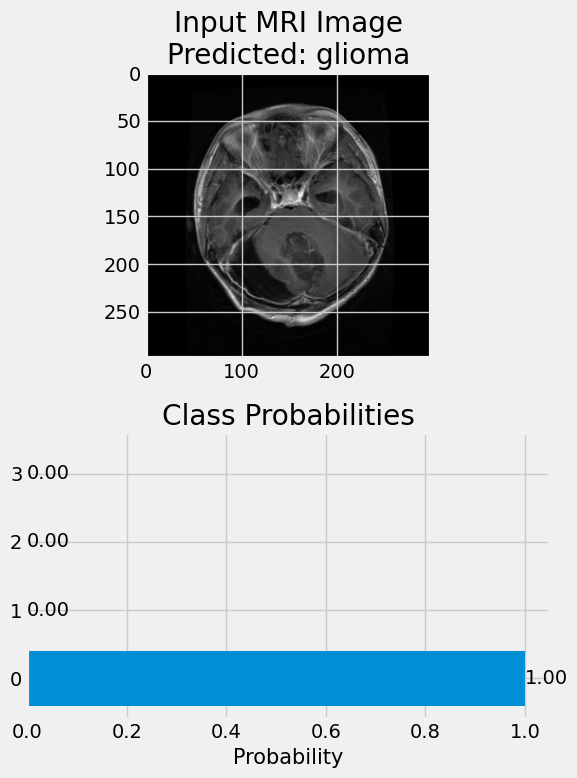


Predicted tumor type: glioma


In [27]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [28]:
model.save_weights('xception_model.weights.h5')

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers